# Working with Percentiles (and Quantiles) of Distributions

Many times we want to observe different distributional properties of scenario data. The **pyam** function `compute.quantiles()` can help!

In [7]:
import pyam

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

## 0. Define timeseries data and initialize an IamDataFrame

This tutorial uses a scenario similar to the data in the **first-steps tutorial** (here on
[GitHub](https://github.com/IAMconsortium/pyam/blob/master/doc/source/tutorials/pyam_first_steps.ipynb)
and on [read the docs](https://pyam-iamc.readthedocs.io/en/stable/tutorials/pyam_first_steps.html)).  
Please read that tutorial for the reference and further information.

In [8]:
df = pyam.IamDataFrame(data='tutorial_data.csv')
df.timeseries().head()

pyam.core - INFO: Reading file tutorial_data.csv


2010  \
model       scenario       region variable                              unit                    
AIM/CGE 2.1 CD-LINKS_INDCi R5ASIA Emissions|CO2                         Mt CO2/yr  11231.0880   
                                  Primary Energy                        EJ/yr        145.7409   
                                  Primary Energy|Biomass                EJ/yr         23.6647   
                                  Primary Energy|Fossil                 EJ/yr        116.1932   
                                  Primary Energy|Non-Biomass Renewables EJ/yr          4.5139   

                                                                                         2020  \
model       scenario       region variable                              unit                    
AIM/CGE 2.1 CD-LINKS_INDCi R5ASIA Emissions|CO2                         Mt CO2/yr  14359.2801   
                                  Primary Energy                        EJ/yr        191.0565   
                                  Primary Energy|Biomass                EJ/yr         24.0751   
                                  Primary Energy|Fossil                 EJ/yr        155.0735   
                                  Primary Energy|Non-Biomass Renewables EJ/yr          9.2641   

                                                                                         2030  \
model       scenario       region variable                              unit                    
AIM/CGE 2.1 CD-LINKS_INDCi R5ASIA Emissions|CO2                         Mt CO2/yr  14873.5967   
                                  Primary Energy                        EJ/yr        216.2135   
                                  Primary Energy|Biomass                EJ/yr         25.9262   
                                  Primary Energy|Fossil                 EJ/yr        168.2376   
                                  Primary Energy|Non-Biomass Renewables EJ/yr         17.0767   

                                                                                         2040  \
model       scenario       region variable                              unit                    
AIM/CGE 2.1 CD-LINKS_INDCi R5ASIA Emissions|CO2                         Mt CO2/yr  15238.9081   
                                  Primary Energy                        EJ/yr        234.2793   
                                  Primary Energy|Biomass                EJ/yr         27.3646   
                                  Primary Energy|Fossil                 EJ/yr        179.0562   
                                  Primary Energy|Non-Biomass Renewables EJ/yr         22.0967   

                                                                                         2050  \
model       scenario       region variable                              unit                    
AIM/CGE 2.1 CD-LINKS_INDCi R5ASIA Emissions|CO2                         Mt CO2/yr  15180.1854   
                                  Primary Energy                        EJ/yr        245.9771   
                                  Primary Energy|Biomass                EJ/yr         29.6938   
                                  Primary Energy|Fossil                 EJ/yr        185.2168   
                                  Primary Energy|Non-Biomass Renewables EJ/yr         25.3211   

                                                                                         2060  \
model       scenario       region variable                              unit                    
AIM/CGE 2.1 CD-LINKS_INDCi R5ASIA Emissions|CO2                         Mt CO2/yr  15513.1760   
                                  Primary Energy                        EJ/yr        258.3201   
                                  Primary Energy|Biomass                EJ/yr         29.8102   
                                  Primary Energy|Fossil                 EJ/yr        195.6202   
                                  Primary Energy|Non-Biomass Renewables EJ/yr         26.6589   

         

## 1. Let's see how many scenarios define CO2 emissions


In [9]:
df.filter(variable='Emissions|CO2', region='World').scenario

['1.0',
 'CD-LINKS_INDCi',
 'CD-LINKS_NPi',
 'CD-LINKS_NPi2020_1000',
 'CD-LINKS_NPi2020_1600',
 'CD-LINKS_NPi2020_400',
 'CD-LINKS_NoPolicy',
 'Faster Transition Scenario']

## 2. Get the median

The median is the `0.5` quantile (or percentile) - let's take a look!

<AxesSubplot:title={'center':'model: unweighted - scenario: quantile_0.5 - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

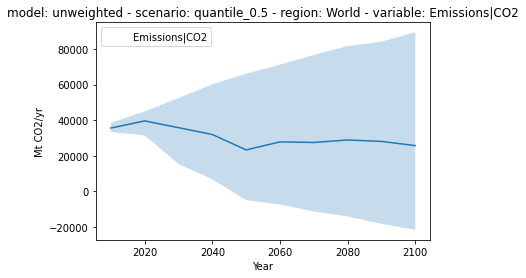

In [10]:
fig, ax = plt.subplots()

# plot the background field of scenario data
(
    df
    .filter(variable='Emissions|CO2', region='World')
    .plot
    .line(color='variable', alpha=0, fill_between=True, ax=ax)
)

# plot just the median
(
    df
    .filter(variable='Emissions|CO2', region='World')
    .compute.quantiles([0.5])
    .plot
    .line(ax=ax)
)

## 3. Get arbitrary quantiles


<AxesSubplot:title={'center':'model: unweighted - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

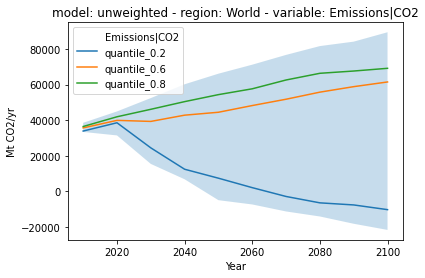

In [11]:
fig, ax = plt.subplots()

# plot the background field of scenario data
(
    df
    .filter(variable='Emissions|CO2', region='World')
    .plot
    .line(color='variable', alpha=0, fill_between=True, ax=ax)
)

# plot quantiles
(
    df
    .filter(variable='Emissions|CO2', region='World')
    .compute.quantiles([0.2, 0.6, 0.8])
    .plot
    .line(ax=ax)
)

## 4. Weighted Quantiles

Weighted quantiles are also supported via the `wquantiles` package and are keyed to model/scenario combinations (unless the `level` argument is provided to `compute.quantiles()`). 

In [12]:
weights = df.meta.assign(weight=np.random.rand(len(df.meta)))
weights.head()

exclude    weight
model       scenario                                
AIM/CGE 2.1 CD-LINKS_INDCi           False  0.602473
            CD-LINKS_NPi             False  0.787914
            CD-LINKS_NPi2020_1000    False  0.400528
            CD-LINKS_NPi2020_1600    False  0.927644
            CD-LINKS_NPi2020_400     False  0.691232

<AxesSubplot:title={'center':'model: weighted - region: World - variable: Emissions|CO2'}, xlabel='Year', ylabel='Mt CO2/yr'>

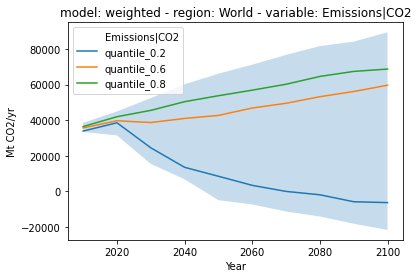

In [13]:
fig, ax = plt.subplots()

# plot the background field of scenario data
(
    df
    .filter(variable='Emissions|CO2', region='World')
    .plot
    .line(color='variable', alpha=0, fill_between=True, ax=ax)
)

# plot weighted quantiles
(
    df
    .filter(variable='Emissions|CO2', region='World')
    .compute.quantiles([0.2, 0.6, 0.8], weights=weights['weight'])
    .plot
    .line(ax=ax)
)